# Model Experiments

Model Ideas:

Non-Pretrained (will train from scratch):
- UNet (https://github.com/labmlai/annotated_deep_learning_paper_implementations) - The earliest, foundational architecture for medical image segmentation
- Fully Convolutional Transformer (https://arxiv.org/pdf/2206.00566v1.pdf)


In [1]:
import numpy as np
import os.path
from PIL import Image
from glob import glob
from skimage.transform import resize
import torch

from utils.define_fct import *
from utils.define_unet import *
from utils.loss import *
from utils.prepare_data import *
from utils.test import *
from utils.train import *

In [2]:
print(os.getcwd())

c:\Users\Derek\Documents\SLU_Capstone


__Preparing data:__

In [3]:
data_path = 'C:/Users/Derek/Documents/SLU_Capstone/'

prepare_data(data_path)

Train Image Count: X: 20, Y: 20
Test Image Count: X: 20, Y: 20


100%|██████████| 20/20 [00:00<00:00, 43.32it/s]


## U-Net Training

In [3]:
train_model_unet()

Dataset Size:
Train: 80 - Valid: 20

Device used: cuda
Valid loss improved from inf to 1.2887. Saving checkpoint: files/checkpoint_unet.pth
Epoch: 01 | Epoch Time: 0m 14s
	Train Loss: 1.226
	 Val. Loss: 1.289

Valid loss improved from 1.2887 to 0.9789. Saving checkpoint: files/checkpoint_unet.pth
Epoch: 02 | Epoch Time: 0m 11s
	Train Loss: 1.013
	 Val. Loss: 0.979

Valid loss improved from 0.9789 to 0.9518. Saving checkpoint: files/checkpoint_unet.pth
Epoch: 03 | Epoch Time: 0m 11s
	Train Loss: 0.956
	 Val. Loss: 0.952

Valid loss improved from 0.9518 to 0.8886. Saving checkpoint: files/checkpoint_unet.pth
Epoch: 04 | Epoch Time: 0m 11s
	Train Loss: 0.913
	 Val. Loss: 0.889

Valid loss improved from 0.8886 to 0.8520. Saving checkpoint: files/checkpoint_unet.pth
Epoch: 05 | Epoch Time: 0m 11s
	Train Loss: 0.875
	 Val. Loss: 0.852

Valid loss improved from 0.8520 to 0.8010. Saving checkpoint: files/checkpoint_unet.pth
Epoch: 06 | Epoch Time: 0m 11s
	Train Loss: 0.840
	 Val. Loss: 0.801



__Performance:__

In [2]:
model_performance('unet')

100%|██████████| 20/20 [00:10<00:00,  1.98it/s]

Jaccard: 0.6662

F1: 0.7994

Precision: 0.8163

Recall: 0.7878

Accuracy: 0.9657

AUC ROC: 0.8854
FPS:  6.415138261904962


Looking at some predicted images:

Image order: [Image, Mask, Prediction]

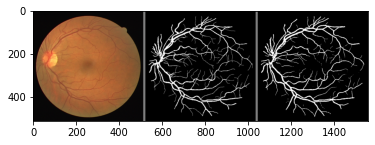

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('results/01_test_0.png')
plt.imshow(img)
plt.show()

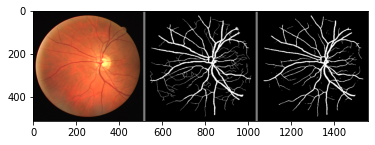

In [8]:
img = mpimg.imread('results/04_test_0.png')
plt.imshow(img)
plt.show()

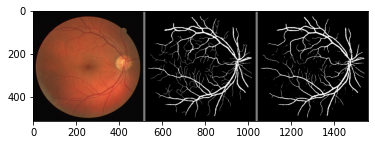

In [9]:
img = mpimg.imread('results/10_test_0.png')
plt.imshow(img)
plt.show()

## FCT Training

In [4]:
train_model_fct()

Dataset Size:
Train: 80 - Valid: 20

Device used: cuda
Valid loss improved from inf to 0.2643. Saving checkpoint: files/checkpoint.pth
Epoch: 01 | Epoch Time: 0m 14s
	Train Loss: 0.287
	 Val. Loss: 0.264

Valid loss improved from 0.2643 to 0.2641. Saving checkpoint: files/checkpoint.pth
Epoch: 02 | Epoch Time: 0m 10s
	Train Loss: 0.266
	 Val. Loss: 0.264

Valid loss improved from 0.2641 to 0.2620. Saving checkpoint: files/checkpoint.pth
Epoch: 03 | Epoch Time: 0m 10s
	Train Loss: 0.264
	 Val. Loss: 0.262

No improvement in loss. Patience count now at 1.
Epoch: 04 | Epoch Time: 0m 10s
	Train Loss: 0.264
	 Val. Loss: 0.262

No improvement in loss. Patience count now at 2.
Epoch: 05 | Epoch Time: 0m 10s
	Train Loss: 0.264
	 Val. Loss: 0.262

No improvement in loss. Patience count now at 3.
Epoch: 06 | Epoch Time: 0m 10s
	Train Loss: 0.264
	 Val. Loss: 0.262

Valid loss improved from 0.2620 to 0.2612. Saving checkpoint: files/checkpoint.pth
Epoch: 07 | Epoch Time: 0m 10s
	Train Loss: 0.263

In [2]:
model_performance('fct')

100%|██████████| 20/20 [00:04<00:00,  4.37it/s]

Jaccard: 0.5581

F1: 0.7154

Precision: 0.8180

Recall: 0.6404

Accuracy: 0.9581

AUC ROC: 0.8137
FPS:  7.252248159339398


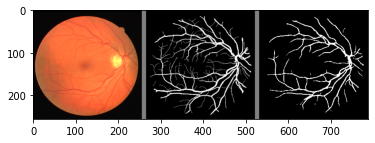

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('results/02_test_0_fct.png')
plt.imshow(img)
plt.show()

In [4]:
# Comparing model size
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
checkpoint_path_unet = "files/checkpoint_unet.pth"
checkpoint_path_fct = "files/checkpoint.pth"

fct = build_fct()
fct = fct.to(device)
fct.load_state_dict(torch.load(checkpoint_path_fct, map_location=device))

unet = build_unet()
unet = unet.to(device)
unet.load_state_dict(torch.load(checkpoint_path_unet, map_location=device))

<All keys matched successfully>

In [5]:
fct_params = sum(
    param.numel() for param in fct.parameters()
)

unet_params = sum(
    param.numel() for param in unet.parameters()
)

print(f'FCT Weight Count: {fct_params}')
print(f'UNet Weight Count: {unet_params}')

FCT Weight Count: 12789401
UNet Weight Count: 31043521
